<a href="https://colab.research.google.com/github/jinha5114/DSMC/blob/main/%EC%A7%80%EB%82%98%EA%B0%80%EC%9A%94_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
file_path = ("/content/drive/MyDrive/Train (1).csv")

In [17]:
data = pd.read_csv(file_path)

In [18]:
print(data.head())
print(data.info())

   subject_id               extu_d  y_extubation  gender  anchor_age  height  \
0    10037861  2117-03-24T16:10:00             0       1          77  187.96   
1    10269234  2151-06-07T10:44:00             0       0          72  167.64   
2    10373014  2154-01-17T11:12:00             0       1          86  160.02   
3    10445331  2160-02-24T12:10:00             0       1          81  180.34   
4    10476294  2185-08-09T13:30:00             0       1          77  170.18   

      weight        los  gcs_value  rass_value  ...  SAH  ICH  IS  cardiac  \
0  76.000000  10.416782     2.6190          -5  ...    0    0   0        1   
1  84.900000   4.556192     5.7616          -4  ...    1    1   0        1   
2  49.900000   2.977442    11.7508          -1  ...    0    0   0        1   
3  85.706202  11.883623    13.3221          -1  ...    0    1   0        1   
4  72.300000   6.370903     7.3329          -3  ...    1    0   0        1   

   resp  neuro  dm  cd        bmi  P/F ratio  
0  

extu_d: 날짜

y_extubation: 환기관 제거 여부(0=제거안됨, 1=제거됨)

gender: 성별(0=여자, 1=남자)

los: 입원 기간

gcs_value: 환자 의식 수준

rass_value: 환자 경련 및 진정 상태

heart_value: 심박수

respiratoryrate_value: 환자 호흡수

sbp_value: 수축기 혈압

dbp_value: 이완기 혈압

map_value: 평균동맥압

spo_value: 혈중 산소 포화도

bt_value: 혈액 pH

pco_value: 혈액 이산화탄소분압(pCO2)

pao_value: 혈액 산소분압(pO2)

lacticacid_value: 혈중 라크타트 농도

fio_value: 호흡기 산소 농도

tidalvolumeobserved_value: 관찰된 환기량

PEEPset_value: 양압지속숨기 값

sbt_value: 자기압력 숨기 값

albuminlab_value: 혈청 알부민 농도

wbclab_value: 백혈구 수

hblab_value: 혈중 헤모글로빈 농도

platetlab_value: 혈소판 수

bunlab_value: 혈중 요소질소 농도

totalbilirubinlab_value: 혈중 총 빌리루빈 농도

antibiotics_value: 항생제 사용 여부

vasopressor_value: 혈압약 사용 여부

ventilatortime_value: 환기장치 사용 시간

TBI: 뇌진탕 여부

SAH: 뇌출혈 여부

ICH: 뇌출혈 여부

IS: 뇌졸중 여부

cardiac: 심혈관 질환 여부

resp: 호흡기 질환 여부

neuro: 신경학적 질환 여부

dm: 당뇨병 여부

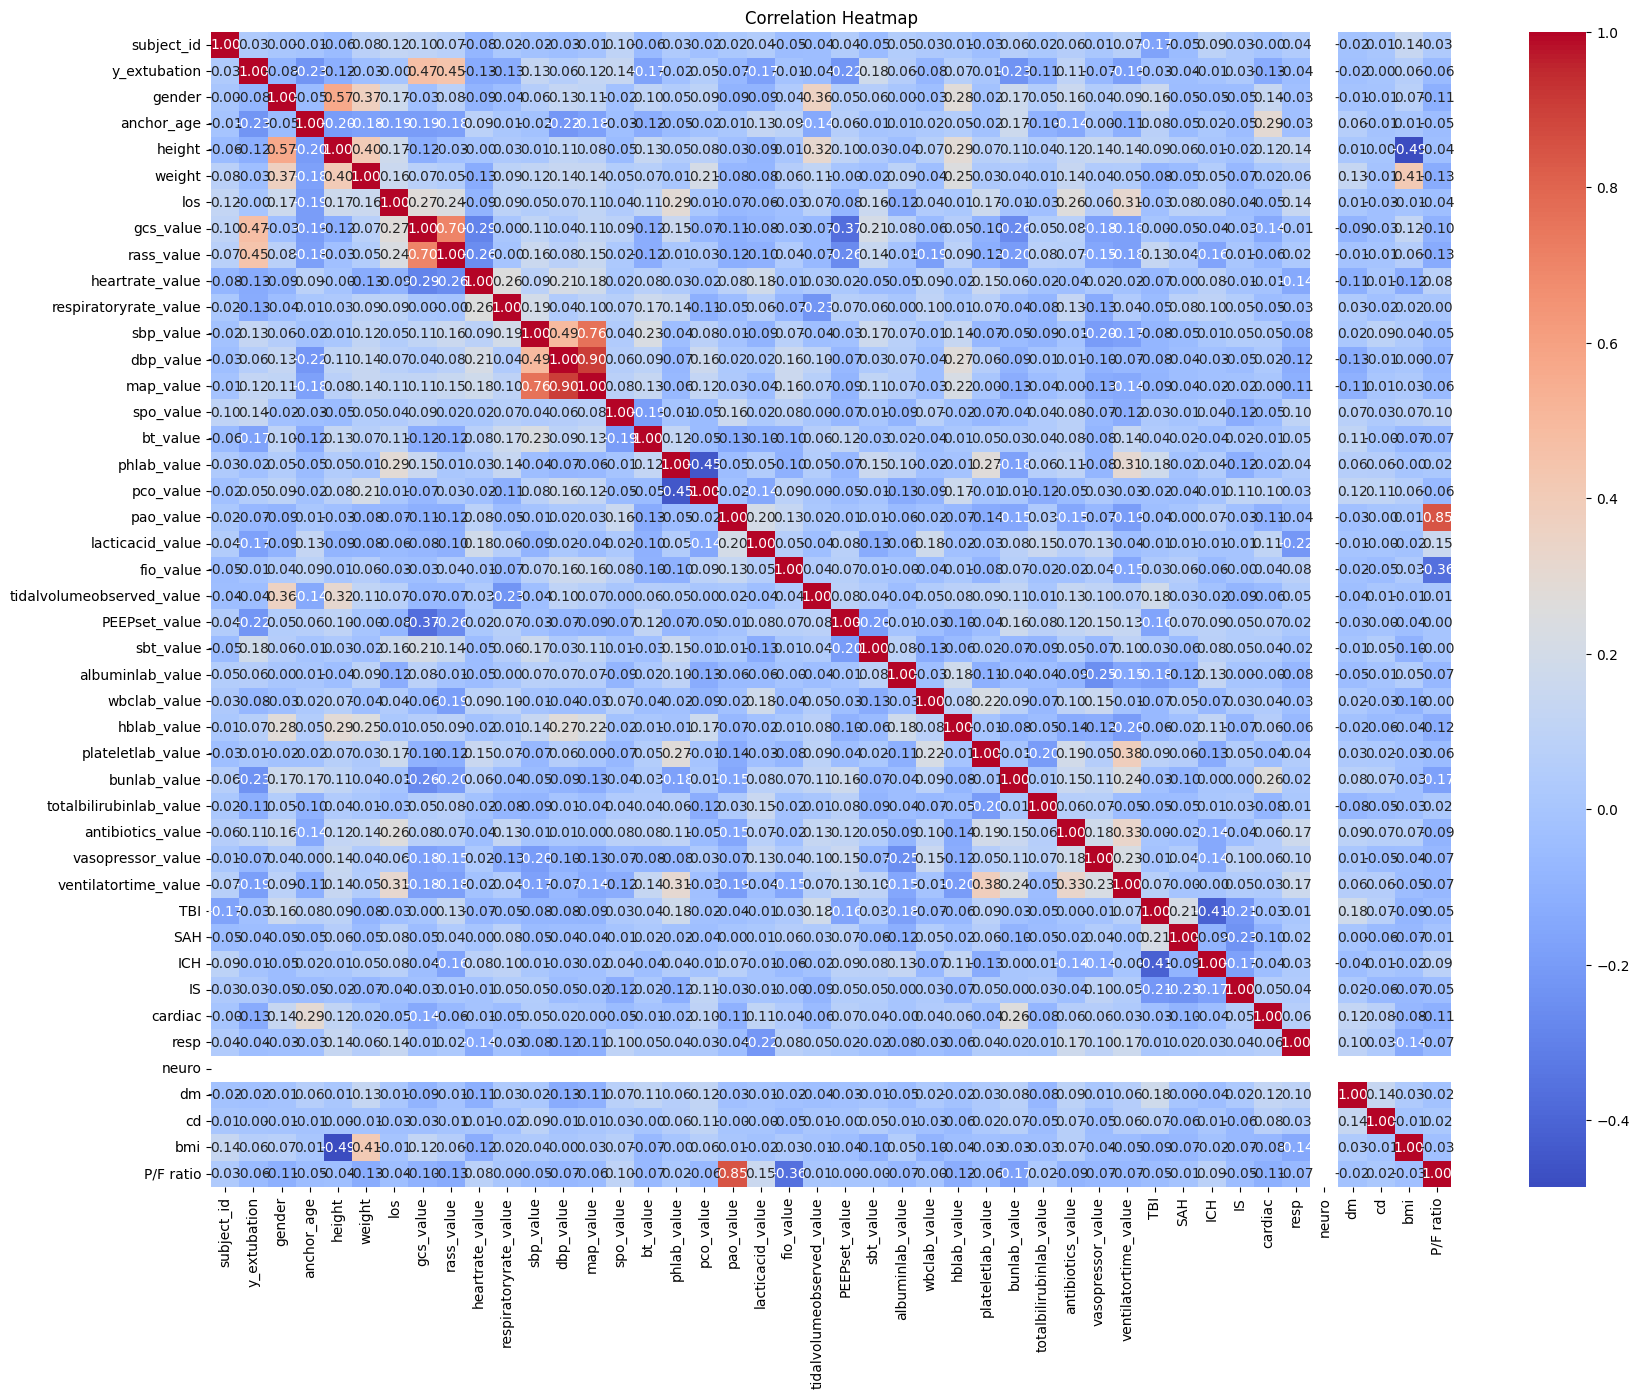

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

data_without_extu_d = data.drop(columns=['extu_d'])
numeric_columns = data_without_extu_d.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(20,15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [20]:
# 문자열을 포함하지 않는 열만 선택
numeric_columns = data.select_dtypes(include=['int64', 'float64'])

# y_extubation과 다른 모든 변수 간의 상관 관계 계산
correlation_with_y = numeric_columns.corr()['y_extubation'].sort_values(ascending=False)

# 결과 출력
print(correlation_with_y)



y_extubation                 1.000000
gcs_value                    0.468037
rass_value                   0.448482
sbt_value                    0.179434
spo_value                    0.138358
sbp_value                    0.125556
map_value                    0.119086
antibiotics_value            0.105946
hblab_value                  0.069619
dbp_value                    0.064266
bmi                          0.062330
albuminlab_value             0.058782
pco_value                    0.051717
subject_id                   0.031813
IS                           0.028506
plateletlab_value            0.006696
cd                           0.000361
los                         -0.000017
ICH                         -0.012431
fio_value                   -0.014586
phlab_value                 -0.023540
dm                          -0.023881
TBI                         -0.029425
weight                      -0.033333
resp                        -0.039017
SAH                         -0.041132
tidalvolumeo

gcs_value(의식 수준) 값과 양의 상관관계. 의식 수준 높을수록 환기관 제거 가능성 높음.

rass_value(경련 및 진정 상태) 값과 양의 상관관계. 경련 상태 낮을수록 환기관 제거 가능성 높음.

ventilatortime_value: 환기장치 사용 시간과 음의 상관 관계. 환기장치 사용 시간이 길면 환기관이 제거될 가능성이 낮아짐.

PEEPset_value: 양압지속숨기값이 높으면 환기관 제거 가능성 낮아짐.

anchor_age: 입원시 나이가 많을수록 환기관 제거될 가능성 낮아짐.

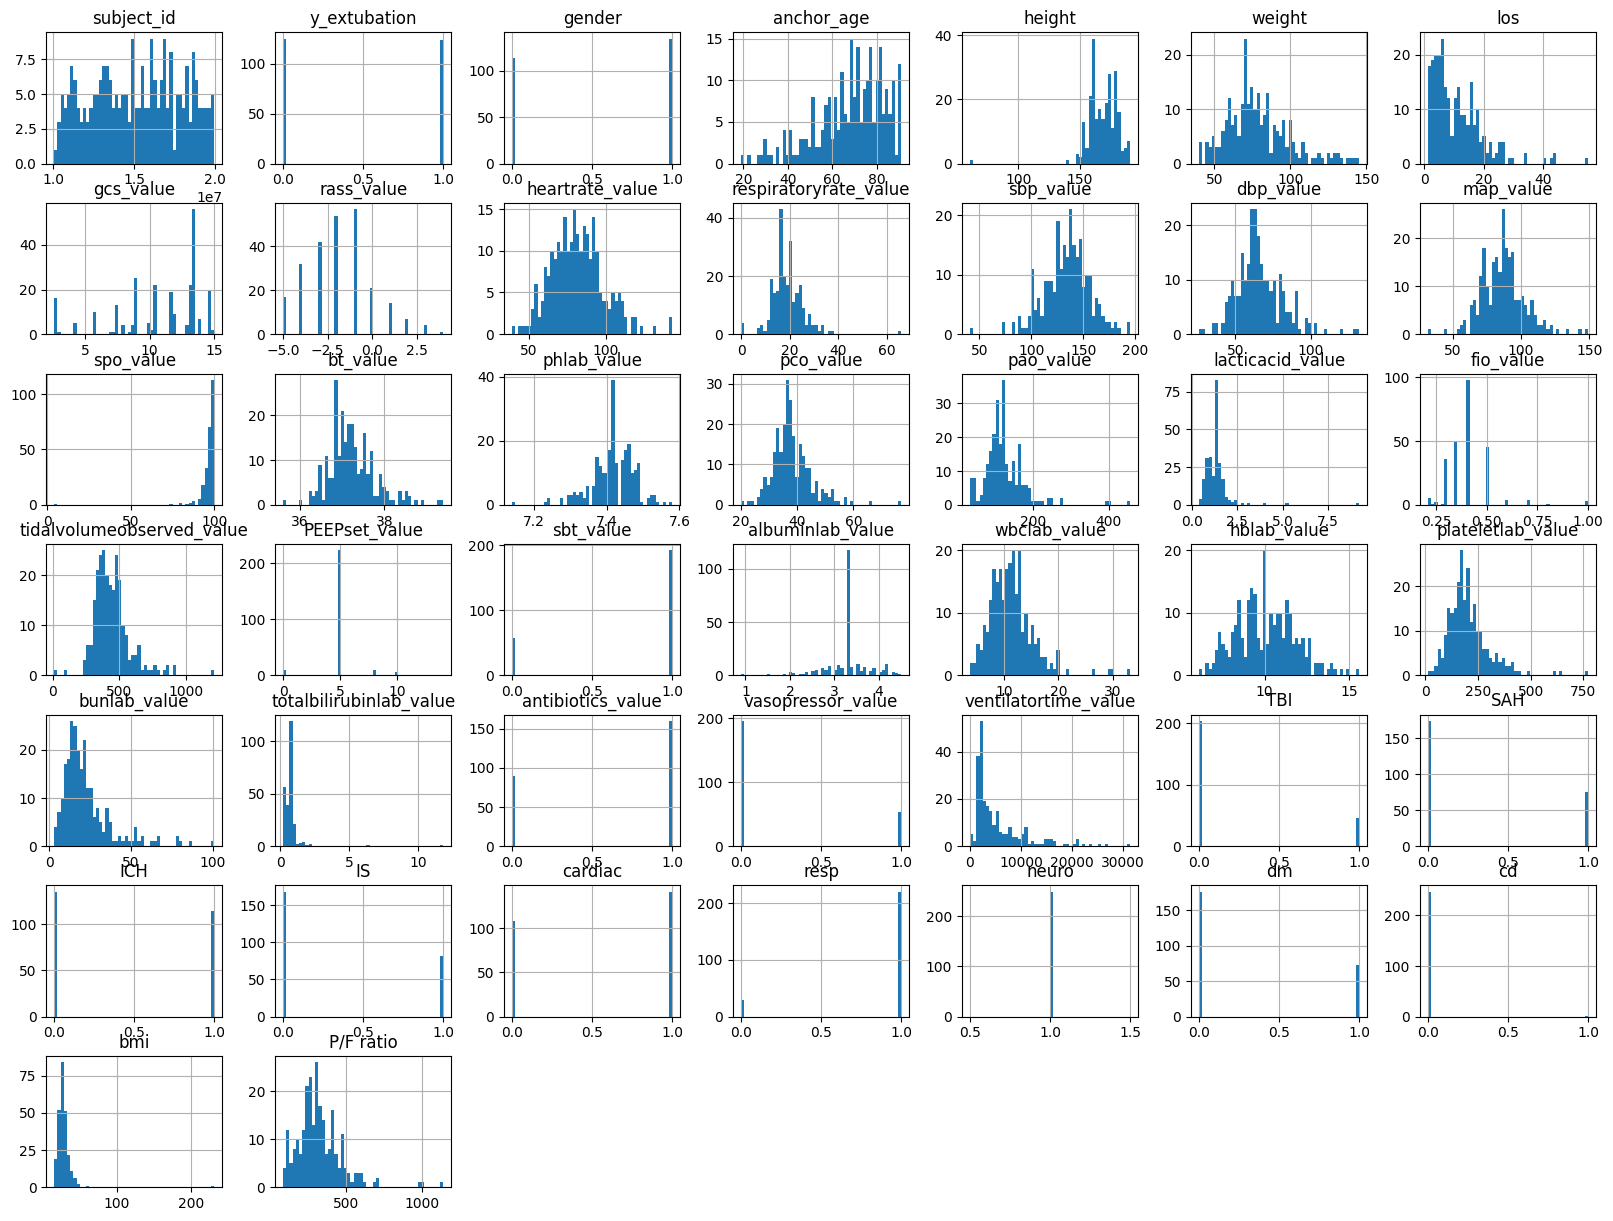

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

data.hist(bins=50, figsize=(20,15))
plt.show()

In [22]:
df = pd.DataFrame(data)

In [23]:
df

,subject_id,extu_d,y_extubation,gender,anchor_age,height,weight,los,gcs_value,rass_value,...,SAH,ICH,IS,cardiac,resp,neuro,dm,cd,bmi,P/F ratio
0,10037861,2117-03-24T16:10:00,0,1,77,187.960000,76.000000,10.416782,2.6190,-5,...,0,0,0,1,1,1,1,0,21.512096,316.667
1,10269234,2151-06-07T10:44:00,0,0,72,167.640000,84.900000,4.556192,5.7616,-4,...,1,1,0,1,1,1,1,0,30.210116,328.571
2,10373014,2154-01-17T11:12:00,0,1,86,160.020000,49.900000,2.977442,11.7508,-1,...,0,0,0,1,1,1,0,0,19.487315,140.000
3,10445331,2160-02-24T12:10:00,0,1,81,180.340000,85.706202,11.883623,13.3221,-1,...,0,1,0,1,1,1,1,0,26.352882,170.000
4,10476294,2185-08-09T13:30:00,0,1,77,170.180000,72.300000,6.370903,7.3329,-3,...,1,0,0,1,0,1,0,0,24.964407,270.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,19755487,2158-04-23T15:25:00,1,0,91,160.148427,70.532710,3.239282,8.9042,1,...,0,0,1,1,1,1,0,0,27.500793,291.429
245,19815419,2135-05-01T11:51:00,1,1,38,175.260000,81.700000,15.996771,13.1741,2,...,0,1,1,1,1,1,0,0,26.598457,270.000
246,19831176,2149-01-31T10:55:00,1,0,77,154.940000,66.200000,15.017963,13.3221,-1,...,0,1,0,0,1,1,0,0,27.575976,330.000
247,19861375,2168-04-25T11:33:00,1,1,82,60.960000,85.706202,4.121829,14.7454,-1,...,0,0,0,0,0,1,0,0,230.633469,417.500


In [24]:
df['extu_d']

0      2117-03-24T16:10:00
1      2151-06-07T10:44:00
2      2154-01-17T11:12:00
3      2160-02-24T12:10:00
4      2185-08-09T13:30:00
              ...         
244    2158-04-23T15:25:00
245    2135-05-01T11:51:00
246    2149-01-31T10:55:00
247    2168-04-25T11:33:00
248    2175-05-02T13:00:00
Name: extu_d, Length: 249, dtype: object

In [25]:
df['y_extubation'].value_counts()

y_extubation
0    125
1    124
Name: count, dtype: int64

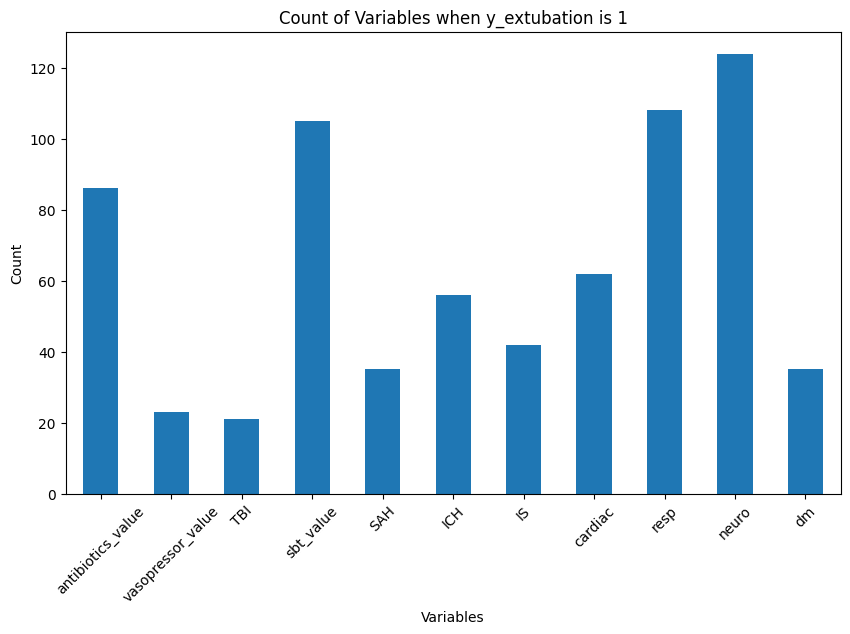

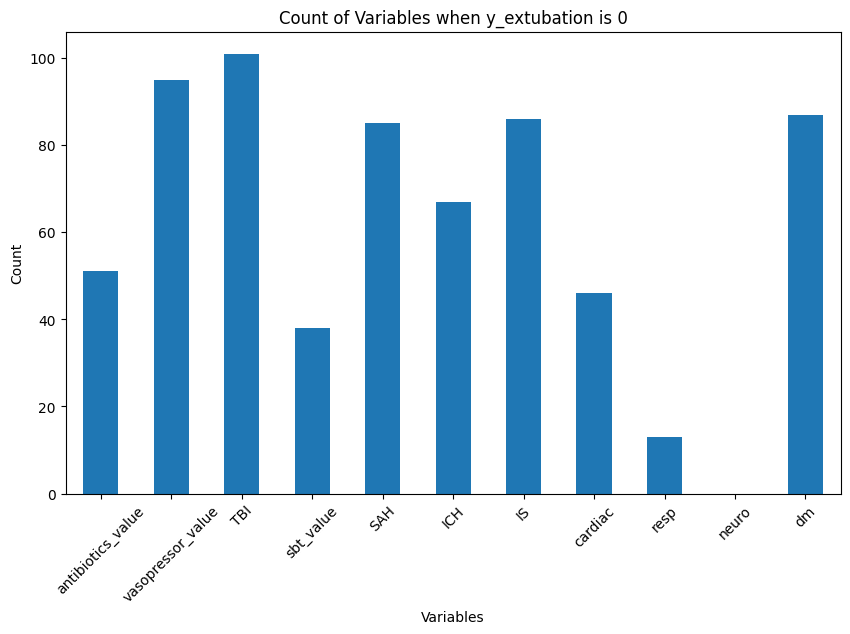

In [26]:
# y_extubation이 1인 경우 필터링
df_extubated = df[df['y_extubation'] == 1]

# 주어진 변수들이 1인 경우 카운트
variables = ['antibiotics_value', 'vasopressor_value', 'TBI', 'sbt_value',
             'SAH', 'ICH', 'IS', 'cardiac', 'resp', 'neuro', 'dm']

counts = df_extubated[variables].sum()

# 결과를 시각화
plt.figure(figsize=(10, 6))
counts.plot(kind='bar')
plt.title('Count of Variables when y_extubation is 1')
plt.xlabel('Variables')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# y_extubation이 0인 경우 필터링
df_extubated = df[df['y_extubation'] == 0]

# 주어진 변수들이 0인 경우 카운트
variables = ['antibiotics_value', 'vasopressor_value', 'TBI', 'sbt_value',
             'SAH', 'ICH', 'IS', 'cardiac', 'resp', 'neuro', 'dm']

counts = (df_extubated[variables]==0).sum()

# 결과를 시각화
plt.figure(figsize=(10, 6))
counts.plot(kind='bar')
plt.title('Count of Variables when y_extubation is 0')
plt.xlabel('Variables')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

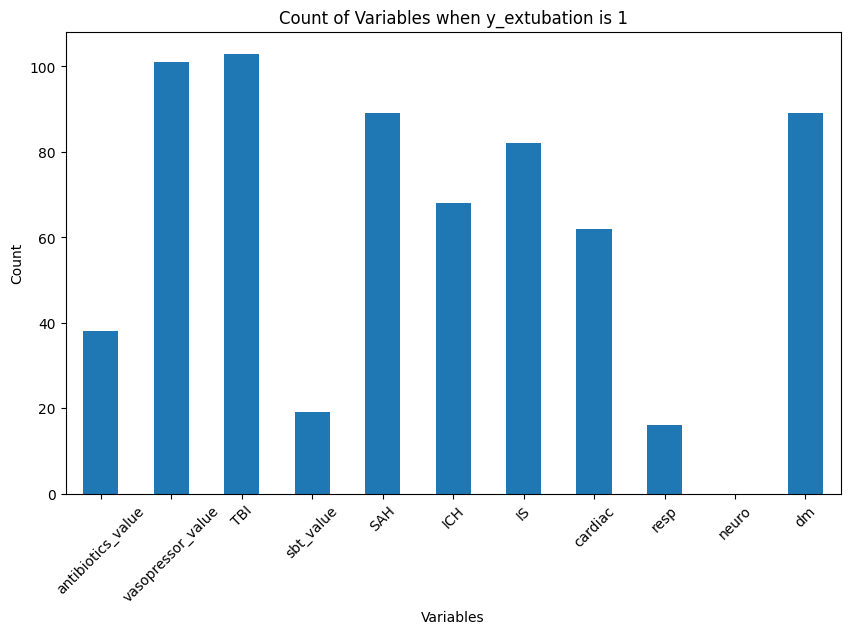

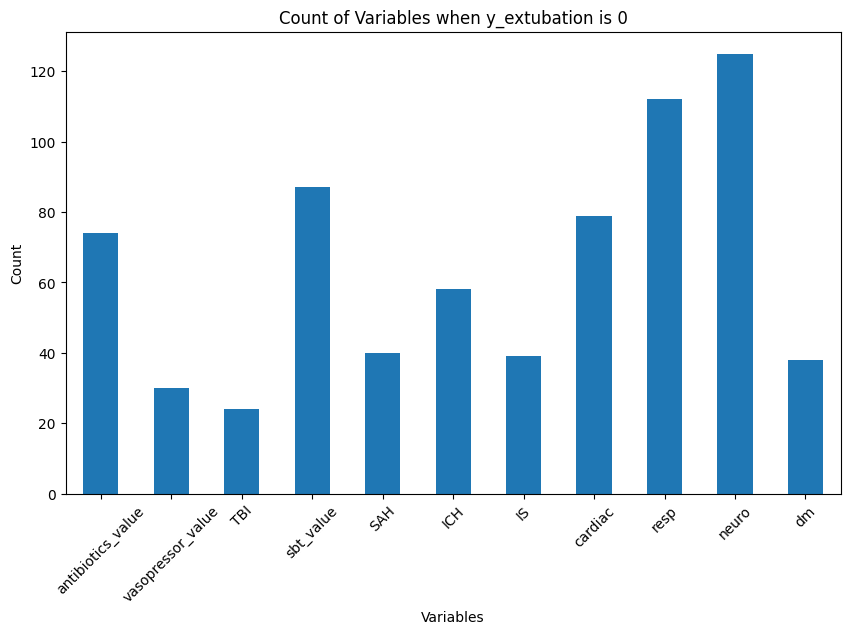

In [27]:
# y_extubation이 1인 경우 필터링
df_extubated = df[df['y_extubation'] == 1]

# 주어진 변수들이 0인 경우 카운트
variables = ['antibiotics_value', 'vasopressor_value', 'TBI', 'sbt_value',
             'SAH', 'ICH', 'IS', 'cardiac', 'resp', 'neuro', 'dm']

counts = (df_extubated[variables]==0).sum()

# 결과를 시각화
plt.figure(figsize=(10, 6))
counts.plot(kind='bar')
plt.title('Count of Variables when y_extubation is 1')
plt.xlabel('Variables')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# y_extubation이 0인 경우 필터링
df_extubated = df[df['y_extubation'] == 0]

# 주어진 변수들이 1인 경우 카운트
variables = ['antibiotics_value', 'vasopressor_value', 'TBI', 'sbt_value',
             'SAH', 'ICH', 'IS', 'cardiac', 'resp', 'neuro', 'dm']

counts = df_extubated[variables].sum()

# 결과를 시각화
plt.figure(figsize=(10, 6))
counts.plot(kind='bar')
plt.title('Count of Variables when y_extubation is 0')
plt.xlabel('Variables')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [28]:
# y_extubation이 0인 경우 필터링
failed_extubation = df[df['y_extubation'] == 0]

filtered_data = failed_extubation[
    ((failed_extubation['pco_value'] >= 35) & (failed_extubation['pco_value'] <= 45)) &
    ((failed_extubation['pao_value'] < 80)) #pao가 80 미만이면 저산소증 의심된다.
]

selected_columns = ['y_extubation', 'pco_value', 'pao_value']
filtered_data_selected = filtered_data[selected_columns]

print(filtered_data_selected)

     y_extubation  pco_value  pao_value
5               0       39.0       44.0
48              0       42.0       34.0
63              0       44.0       40.0
74              0       35.0       74.0
82              0       44.0       75.0
135             0       36.0       76.0
242             0       39.0       68.0


발관 실패했을 때, pco는 정상으로 뜨면서 pao가 낮은 경우 -> 7명 (저산소증 의심 환자)

In [29]:
# y_extubation이 0인 경우 필터링
failed_extubation = df[df['y_extubation'] == 1]

filtered_data = failed_extubation[

    ((failed_extubation['pao_value'] < 80)) #pao가 80 미만이면 저산소증 의심된다.
]


print(filtered_data)

     subject_id               extu_d  y_extubation  gender  anchor_age  \
110    11468840  2184-04-10T14:06:00             1       1          76   
120    12421828  2123-05-09T16:22:00             1       1          73   
123    12543250  2155-02-06T09:29:00             1       0          68   
131    13038869  2137-04-14T16:40:00             1       1          86   
145    13555425  2119-06-23T17:14:00             1       0          81   
146    13581277  2156-01-13T08:25:00             1       0          58   
149    13745157  2119-10-30T10:35:00             1       1          42   
151    13861919  2151-04-26T16:20:00             1       0          63   
165    14695209  2143-12-14T13:35:00             1       0          35   
173    15110197  2114-04-01T12:00:00             1       1          71   
182    15682194  2145-05-28T15:46:00             1       1          65   
183    15711934  2149-11-24T11:56:00             1       1          80   
196    16540367  2157-04-12T12:40:00  

pao수치가 80미만이라 저산소증이 의심되는 환자의 경우 발관 성공 사례를 보니 gcs_value값이 모두 높음. gcs의 만점은 15점 최저가 3점인 것을 고려하면 발관 성공 환자 모두 의식 수준이 양호함.

In [30]:
extubated_df = df[df['y_extubation'] == 1]

rass_stats = extubated_df['rass_value'].describe()

print(rass_stats)

count    124.000000
mean      -1.024194
std        1.584804
min       -4.000000
25%       -2.000000
50%       -1.000000
75%        0.000000
max        4.000000
Name: rass_value, dtype: float64


발관 성공 시 rass_value의 평균은 -1.024194



In [31]:
extubated_df = df[df['y_extubation'] == 0]

rass_stats = extubated_df['rass_value'].describe()

print(rass_stats)

count    125.000000
mean      -2.664000
std        1.694126
min       -5.000000
25%       -4.000000
50%       -3.000000
75%       -2.000000
max        3.000000
Name: rass_value, dtype: float64


발관 실패 시 rass_value 평균은 -2.6

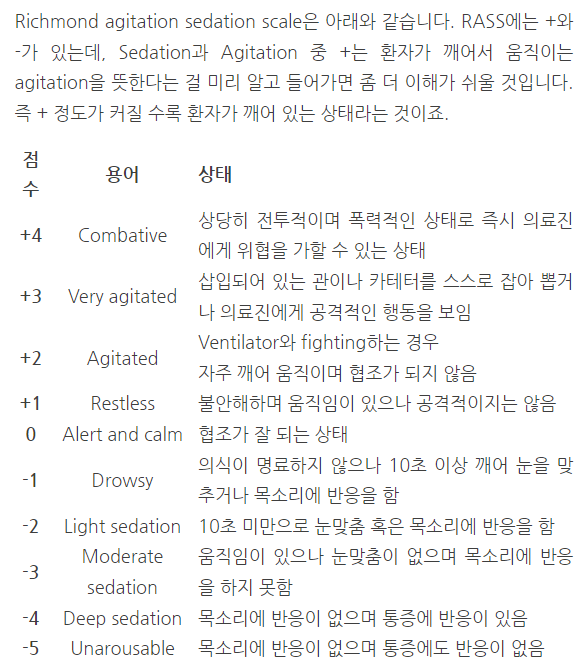

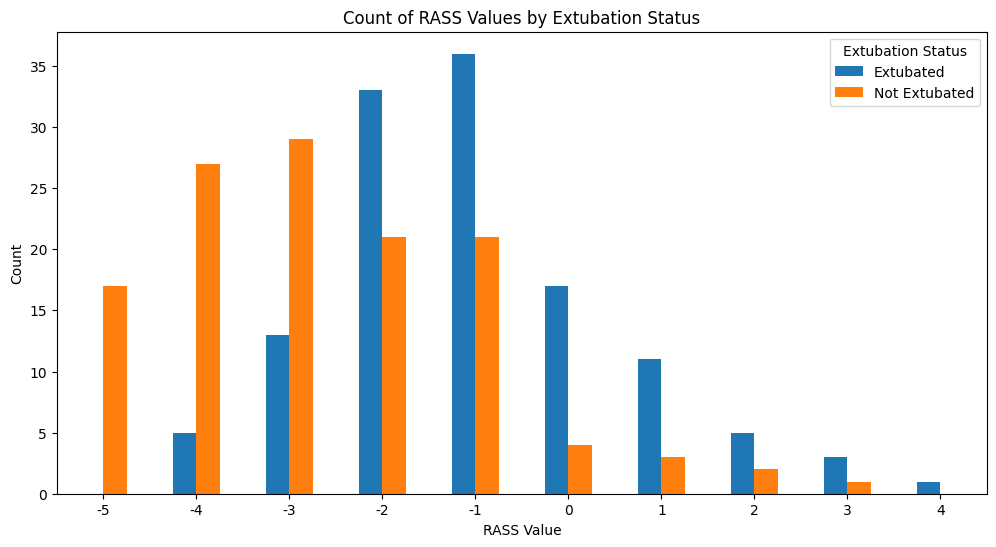

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# y_extubation이 1인 경우 필터링
extubated_df = df[df['y_extubation'] == 1]
not_extubated_df = df[df['y_extubation'] == 0]

# rass_value의 값들을 각각 count
extubated_rass_counts = extubated_df['rass_value'].value_counts().sort_index()
not_extubated_rass_counts = not_extubated_df['rass_value'].value_counts().sort_index()

# 두 데이터프레임 병합
rass_counts = pd.DataFrame({
    'Extubated': extubated_rass_counts,
    'Not Extubated': not_extubated_rass_counts
}).fillna(0)

# 그래프로 시각화
rass_counts.plot(kind='bar', figsize=(12, 6))
plt.title('Count of RASS Values by Extubation Status')
plt.xlabel('RASS Value')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Extubation Status')
plt.show()

In [33]:
extubated_df = df[df['y_extubation'] == 1]

gcs_stats = extubated_df['gcs_value'].describe()

print(gcs_stats)

count    124.000000
mean      12.327569
std        2.012988
min        4.190300
25%       10.475500
50%       13.174100
75%       13.322100
max       15.000000
Name: gcs_value, dtype: float64


In [34]:
extubated_df = df[df['y_extubation'] == 0]

gcs_stats = extubated_df['gcs_value'].describe()

print(gcs_stats)

count    125.000000
mean       9.142743
std        3.759419
min        2.619000
25%        6.888900
50%        8.904200
75%       13.174100
max       14.745400
Name: gcs_value, dtype: float64


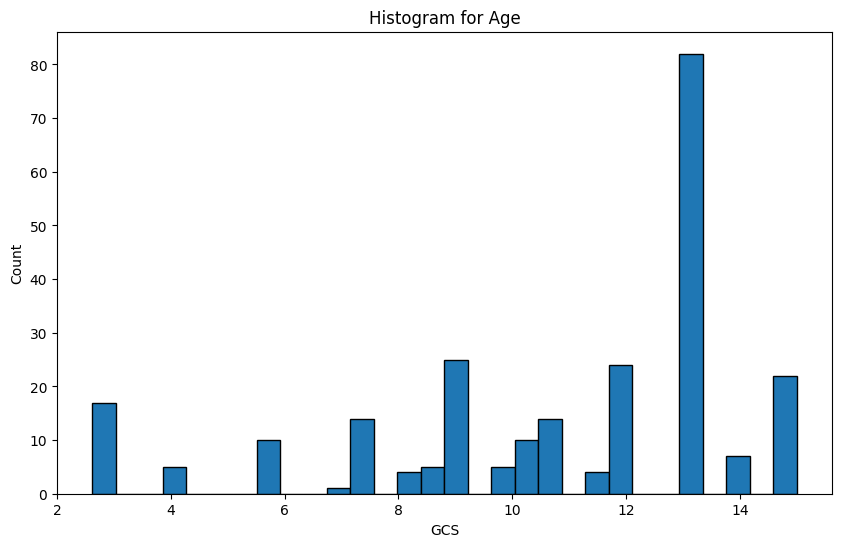

In [35]:
plt.figure(figsize=(10, 6))
plt.hist(df['gcs_value'], bins=30, edgecolor='black')
plt.title('Histogram for Age')
plt.xlabel('GCS')
plt.ylabel('Count')
plt.show()

In [36]:
extubated_df = df[df['y_extubation'] == 1]

pfratio_stats = extubated_df['P/F ratio'].describe()

print(pfratio_stats)

count    124.000000
mean     313.286484
std      122.384121
min       82.000000
25%      238.750000
50%      307.619000
75%      410.357250
max      625.714000
Name: P/F ratio, dtype: float64


In [37]:
extubated_df = df[df['y_extubation'] == 0]

pfratio_stats = extubated_df['P/F ratio'].describe()

print(pfratio_stats)

count     125.000000
mean      330.350968
std       168.314837
min        85.000000
25%       237.500000
50%       297.500000
75%       385.000000
max      1142.500000
Name: P/F ratio, dtype: float64


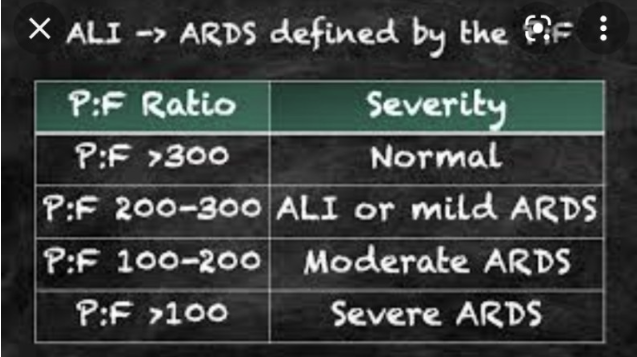

스케일링 포함한 데이터 전처리

In [38]:
import pandas as pd

# 파일 경로 확인
file_path = ("/content/drive/MyDrive/Train (1).csv")

# 데이터 로드
try:
    data = pd.read_csv(file_path)
    print("데이터 로드 후 shape:", data.shape)
except FileNotFoundError:
    print(f"파일을 찾을 수 없습니다: {file_path}")
except pd.errors.EmptyDataError:
    print(f"파일에 데이터가 없습니다: {file_path}")


데이터 로드 후 shape: (249, 45)


In [39]:
data.head()

,subject_id,extu_d,y_extubation,gender,anchor_age,height,weight,los,gcs_value,rass_value,...,SAH,ICH,IS,cardiac,resp,neuro,dm,cd,bmi,P/F ratio
0,10037861,2117-03-24T16:10:00,0,1,77,187.96,76.000000,10.416782,2.6190,-5,...,0,0,0,1,1,1,1,0,21.512096,316.667
1,10269234,2151-06-07T10:44:00,0,0,72,167.64,84.900000,4.556192,5.7616,-4,...,1,1,0,1,1,1,1,0,30.210116,328.571
2,10373014,2154-01-17T11:12:00,0,1,86,160.02,49.900000,2.977442,11.7508,-1,...,0,0,0,1,1,1,0,0,19.487315,140.000
3,10445331,2160-02-24T12:10:00,0,1,81,180.34,85.706202,11.883623,13.3221,-1,...,0,1,0,1,1,1,1,0,26.352882,170.000
4,10476294,2185-08-09T13:30:00,0,1,77,170.18,72.300000,6.370903,7.3329,-3,...,1,0,0,1,0,1,0,0,24.964407,270.000


In [40]:
data = data.drop(['extu_d', 'subject_id'], axis=1)

In [41]:
data.head()

,y_extubation,gender,anchor_age,height,weight,los,gcs_value,rass_value,heartrate_value,respiratoryrate_value,...,SAH,ICH,IS,cardiac,resp,neuro,dm,cd,bmi,P/F ratio
0,0,1,77,187.96,76.000000,10.416782,2.6190,-5,120,28,...,0,0,0,1,1,1,1,0,21.512096,316.667
1,0,0,72,167.64,84.900000,4.556192,5.7616,-4,52,14,...,1,1,0,1,1,1,1,0,30.210116,328.571
2,0,1,86,160.02,49.900000,2.977442,11.7508,-1,110,17,...,0,0,0,1,1,1,0,0,19.487315,140.000
3,0,1,81,180.34,85.706202,11.883623,13.3221,-1,78,15,...,0,1,0,1,1,1,1,0,26.352882,170.000
4,0,1,77,170.18,72.300000,6.370903,7.3329,-3,54,24,...,1,0,0,1,0,1,0,0,24.964407,270.000


In [42]:
# X, y 설정
X = data.drop('y_extubation', axis=1)
y = data['y_extubation']

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (249, 42)
y shape: (249,)


In [43]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC





# 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 모델링 및 그리드 서치
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(),
    'LightGBM': LGBMClassifier(),
    'SVM': SVC(probability=True)
}

params = {
    'Logistic Regression': {'C': [0.01, 0.1, 1, 10, 100]},
    'Random Forest': {'n_estimators': [50, 100, 200]},
    'XGBoost': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]},
    'LightGBM': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]},
    'SVM': {'C': [0.01, 0.1, 1, 10, 100], 'kernel': ['linear', 'rbf']}
}

best_models = {}
for model_name, model in models.items():
    grid = GridSearchCV(model, params[model_name], cv=5, scoring='roc_auc')
    grid.fit(X_train, y_train)
    best_models[model_name] = grid.best_estimator_

# 평가
results = []
for model_name, model in best_models.items():
    y_train_pred = model.predict(X_train)
    y_train_proba = model.predict_proba(X_train)[:, 1]
    y_test_pred = model.predict(X_test)
    y_test_proba = model.predict_proba(X_test)[:, 1]

    train_auc = roc_auc_score(y_train, y_train_proba)
    train_acc = accuracy_score(y_train, y_train_pred)
    test_auc = roc_auc_score(y_test, y_test_proba)
    test_acc = accuracy_score(y_test, y_test_pred)

    results.append({
        'Model': model_name,
        'Train AUC': train_auc,
        'Train Accuracy': train_acc,
        'Test AUC': test_auc,
        'Test Accuracy': test_acc
    })

results_df = pd.DataFrame(results)
print(results_df)


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

SVM 모델이 가장 적합.